In [93]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [94]:
train.to_csv('train.csv',index=True)

In [95]:
x_train = train.drop(['Unnamed: 0','Timestamp','hash-rate'],axis=1)
x_test = test.drop(['Unnamed: 0','Timestamp'],axis=1)
y_train = train['hash-rate']

In [97]:
train = train.drop(['Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [98]:
train

,Unnamed: 0,Unnamed: 0.1.1.1,Timestamp,n-payments-per-block,miners-revenue,trade-volume,avg-block-size,n-payments,n-unique-addresses,difficulty,hash-rate
0,0,0,11/1/2018 0:00,2850.590909,1.241657e+07,232850456.0,0.979455,438991,505058,7.183010e+12,5.197796e+07
1,1,1,11/2/2018 0:00,3486.986014,1.179135e+07,198797396.4,1.117055,498639,565269,7.184400e+12,5.284528e+07
2,2,2,11/3/2018 0:00,2447.701863,1.284079e+07,191863094.4,0.885551,394080,453208,7.184400e+12,5.284686e+07
3,3,3,11/4/2018 0:00,2895.483871,9.959013e+06,174563105.0,1.036363,359040,418053,7.184400e+12,5.412385e+07
4,4,4,11/5/2018 0:00,3191.867133,1.173683e+07,185104915.1,1.043403,456437,531376,7.184400e+12,5.330908e+07
...,...,...,...,...,...,...,...,...,...,...,...
1082,1082,1082,10/18/2021 0:00,4420.986486,5.817390e+07,271015043.0,1.212651,654306,765389,1.991740e+13,1.440952e+08
1083,1083,1083,10/19/2021 0:00,4560.606452,6.180473e+07,753842251.7,1.302748,706894,693316,2.008250e+13,1.444033e+08
1084,1084,1084,10/20/2021 0:00,4536.389262,6.174249e+07,594456878.2,1.179139,675922,597144,2.008250e+13,1.475785e+08
1085,1085,1085,10/21/2021 0:00,4906.932432,6.080715e+07,650092516.5,1.512784,726226,554996,2.008250e+13,1.449535e+08


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = sc.fit_transform(y_train)

ValueError: ignored

In [ ]:

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train).reshape(-1,1)

In [82]:
x_train.shape

(1087, 8)

In [75]:
linear1 = nn.Linear(7,64,bias=True) # 학습 Feature 의 개수 = 11
linear2 = nn.Linear(64,128,bias=True)  
linear3 = nn.Linear(128,128,bias=True)  
linear4 = nn.Linear(128,64,bias=True)  
linear5 = nn.Linear(64,1,bias=True)  
relu = nn.ReLU() # ReLU 기법 사용
dropout = nn.Dropout(p=0.3)

#torch.nn.init.xavier_normal_(linear1.weight)

model = nn.Sequential(linear1,relu,dropout,
                      linear2,relu,dropout,
                      linear3,relu,dropout,
                      linear4,relu,dropout,
                      linear5)

#optimizer는 제일 유명한 Adam기법을 사용하고 learning rate는 0.02
optimizer = optim.Adam(model.parameters(), lr=0.1)
#분류 문제이므로 CrossEntropyLoss 사용
loss = nn.MSELoss()

In [76]:
for epoch in range(101) : #10000번 돌리며
    hypothesis = model(x_train)  #구현한 모델에 x_train데이터를 학습시킬 가설을 설정합니다.
    cost = loss(hypothesis,y_train) #실제 y값과 예측한 y값의 오차를 구합니다.
    
    optimizer.zero_grad() #파라미터를 초기화시켜줍니다.
    cost.backward()  #오차를 전파시킵니다.
    optimizer.step() #optimizer를 갱신해줍니다.
    
    if epoch%100==0:  # epoch가 1000이 될때마다 cost값을 출력해줍니다.
        print("Epoch : ",epoch,"cost : ",cost.item())

Epoch :  0 cost :  1.0046461820602417
Epoch :  1000 cost :  0.6202763915061951


KeyboardInterrupt: ignored

In [65]:
model.eval()
with torch.no_grad():
    y_pred = model(x_train)
    y_pred = y_pred
    correct = y_train== y_pred.squeeze()
    accuracy = correct.sum().item()/len(correct)
    print(accuracy)

0.0


In [66]:
cost

tensor(1.4458e+13, grad_fn=<MseLossBackward>)

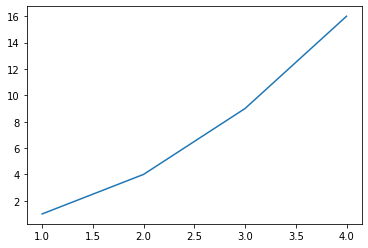

In [69]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

tensor([[5.1978e+07],
        [5.2845e+07],
        [5.2847e+07],
        ...,
        [1.4758e+08],
        [1.4495e+08],
        [1.4671e+08]])